In [51]:
#import tensorflow.keras
import os
from os import listdir
from os.path import isdir, join
import numpy as np
from keras import layers, models, metrics
from subprocess import check_output
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv3D,MaxPooling3D,Dense,Flatten,Dropout
from keras.optimizers import Adam,SGD
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
feature_sets_path  = os.getcwd()
filename = 'all_targets_1686_5418'
feature_sets_filename = filename + '.npz'
model_filename = filename + '_8_8_8_16_16_32.h5'
#feature_sets_filename = 'all_targets_987_5135_2_classes_2023_9_2_7-48.npz'
#model_filename = 'all_targets_987_5135_2_classes_2023_9_2_7-48_minus_CNN01.h5'

In [27]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [28]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [29]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(10160, 64, 4)
(2159, 64, 4)
(2159, 64, 4)


In [30]:
NUMBER_ROWS = 127
NUMBER_COlUMNS = 64
DEPTH = 4

In [31]:
x_train.shape

(10160, 64, 4)

In [32]:
# CNN for TF expects (batch (lote), height, width, channels)
# So we reshape the input tensors with a "color" channel of ''
print(x_train.shape)

x_train = x_train.reshape(int(x_train.shape[0]/(NUMBER_ROWS)),
                          NUMBER_ROWS,
                          NUMBER_COlUMNS,
                          DEPTH,
                          1)
x_val = x_val.reshape(int(x_val.shape[0]/(NUMBER_ROWS)),
                      NUMBER_ROWS,
                      NUMBER_COlUMNS,
                      DEPTH,
                      1)
x_test = x_test.reshape(int(x_test.shape[0]/(NUMBER_ROWS)),
                        NUMBER_ROWS,
                        NUMBER_COlUMNS,
                        DEPTH,
                        1)

(10160, 64, 4)


In [33]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(127, 64, 4, 1)


In [34]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(80, 127, 64, 4, 1)
(17, 127, 64, 4, 1)
(17, 127, 64, 4, 1)


In [35]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential()
model.add(layers.Conv3D(filters=8, kernel_size=(3,3,3), kernel_initializer='random_normal', activation='relu', padding = 'same', input_shape=sample_shape))
model.add(layers.MaxPooling3D(pool_size=(2,2,1)))
model.add(Dropout(0.6))
#atencao, eu mudei pra baixo o numero de filtros
model.add(Conv3D(filters=8, kernel_size=(3,3,3), kernel_initializer='random_normal', activation='relu', padding = 'same'))
model.add(MaxPooling3D(pool_size=(2,2,1)))
model.add(Dropout(0.6))

model.add(Conv3D(filters=8, kernel_size=(3,3,3), kernel_initializer='random_normal', activation='relu', padding = 'same'))
model.add(MaxPooling3D(pool_size=(2,2,1)))
model.add(Dropout(0.6))

model.add(Conv3D(filters=16, kernel_size=(3,3,3), kernel_initializer='random_normal', activation='relu', padding = 'same'))
model.add(MaxPooling3D(pool_size=(2,2,1)))
model.add(Dropout(0.6))

model.add(Conv3D(filters=16, kernel_size=(3,3,3), kernel_initializer='random_normal', activation='relu', padding = 'same'))
model.add(MaxPooling3D(pool_size=(2,2,1)))
model.add(Dropout(0.6))

# Classifier
model.add(Flatten())
#model.add(Dense(6144, kernel_initializer='random_normal', activation='relu'))
#model.add(Dropout(0.4))
#model.add(Dense(1531, kernel_initializer='random_normal', activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='random_normal', activation='relu'))
model.add(Dropout(0.6))
#model.add(Dense(768, kernel_initializer='random_normal', activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(384, kernel_initializer='random_normal', activation='relu'))
#model.add(Dropout(0.3))

#model.add(Dense(96, kernel_initializer='random_normal', activation='relu'))
#model.add(Dropout(0.2))
# Check Number of Classes Before Training
model.add(Dense(3, activation='softmax'))
# Display model
model.layers
model.summary()

c:\Users\Iman\Desktop\Stage\code\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_5 (Conv3D)               │ (None, 127, 64, 4, 8)  │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_5 (MaxPooling3D)  │ (None, 63, 32, 4, 8)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 63, 32, 4, 8)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_6 (Conv3D)               │ (None, 63, 32, 4, 8)   │         1,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_6 (MaxPooling3D)  │ (None, 31, 16, 4, 8)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 31, 16, 4, 8)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_7 (Conv3D)               │ (None, 31, 16, 4, 8)   │         1,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_7 (MaxPooling3D)  │ (None, 15, 8, 4, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 15, 8, 4, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_8 (Conv3D)               │ (None, 15, 8, 4, 16)   │         3,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_8 (MaxPooling3D)  │ (None, 7, 4, 4, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 4, 4, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_9 (Conv3D)               │ (None, 7, 4, 4, 16)    │         6,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_9 (MaxPooling3D)  │ (None, 3, 2, 4, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 2, 4, 16)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        12,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,515 (103.57 KB)

 Trainable params: 26,515 (103.57 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# PatientEearly Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20, restore_best_weights=True)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [37]:
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam', #SGD, RMSProp, Adam, nadam
             loss_weights=0.1,
             metrics=['accuracy'])

In [38]:
# Train
history = model.fit(x_train,
                   y_train,
                   epochs=1000,
                   batch_size=256,
                   validation_data=(x_val,y_val),
                    callbacks = [es])

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5250 - loss: 0.1040 - val_accuracy: 0.4118 - val_loss: 0.1092
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step - accuracy: 0.5750 - loss: 0.0965 - val_accuracy: 0.4118 - val_loss: 0.1083
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step - accuracy: 0.6625 - loss: 0.0850 - val_accuracy: 0.4118 - val_loss: 0.1069
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.5250 - loss: 0.0959 - val_accuracy: 0.4118 - val_loss: 0.1058
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step - accuracy: 0.5125 - loss: 0.0917 - val_accuracy: 0.4118 - val_loss: 0.1050
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step - accuracy: 0.4625 - loss: 0.0855 - val_accuracy: 0.4118 - val_loss: 0.1046
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.5500 - loss: 0.0828 - val_accuracy: 0.4118 - val_loss: 0.1043
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.4125 - loss: 0.0954 - val_accuracy: 0.411

In [39]:
history_14_52 =history

In [40]:
history_14_59 =history

In [41]:
history_15_1 =history

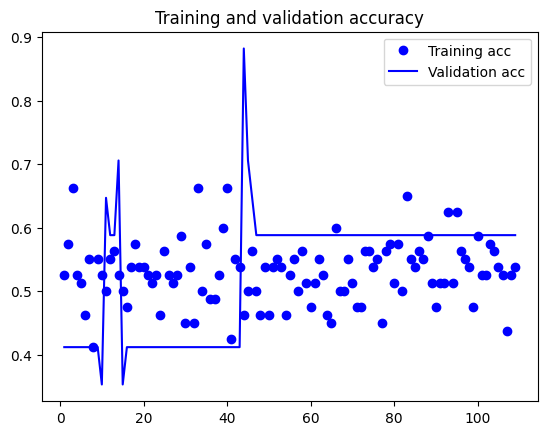

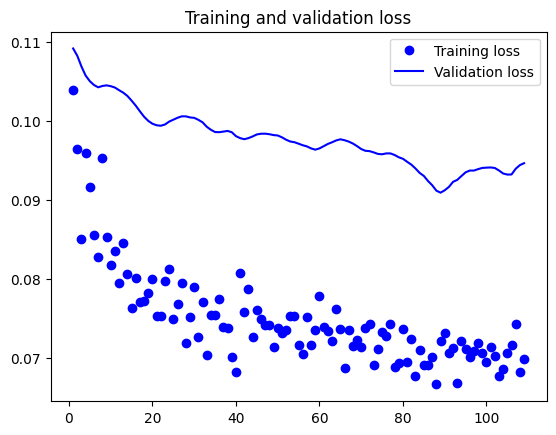

In [42]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
#recall = history.history['recall_1']
#val_recall = history.history['val_recall_1']
#precision = history.history['precision_1']
#val_precision = history.history['val_precision_1']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()





In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

1/1 - 0s - 56ms/step - accuracy: 0.6471 - loss: 0.0912


In [45]:
# Save the model as a file
with open(os.getcwd() + '\\file.txt', 'w') as f:
  f.write(os.getcwd())

models.save_model(model, feature_sets_path + '\\' + model_filename)


In [46]:
print(feature_sets_path + '/' + model_filename)

c:\Users\Iman\Desktop\Stage\code/all_targets_1686_5418_8_8_8_16_16_32.h5


In [48]:
import seaborn as sns
import tensorflow as tf


In [49]:
y_true=y_train
#y_pred=model.predict_classes(x_test)
predict_y=model.predict(x_train)
y_pred=np.argmax(predict_y,axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


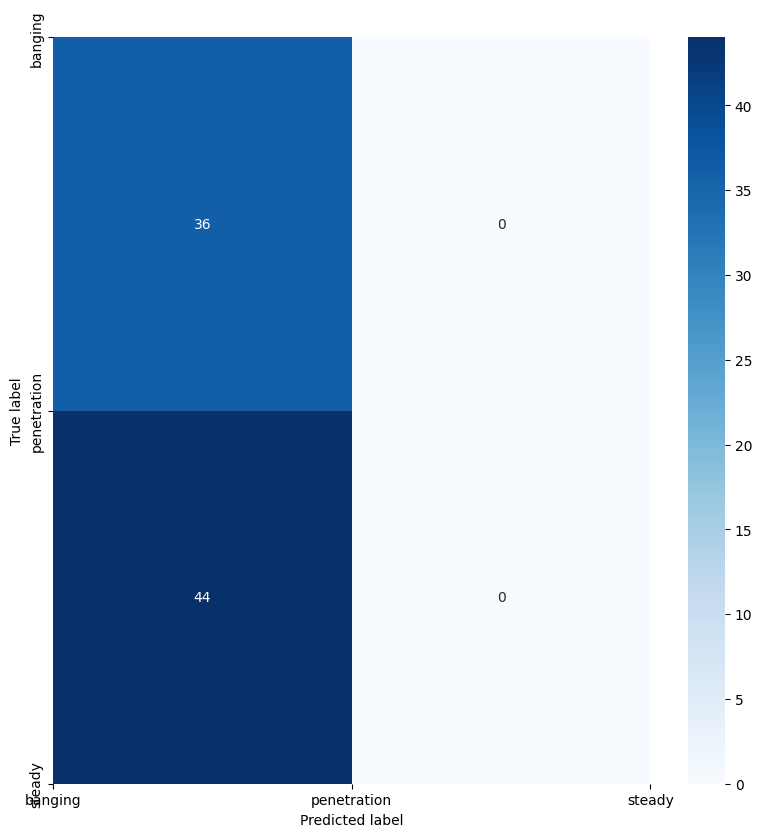

In [50]:
classes = [0,1]
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float')) #/ con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#ax = figure.add_axes([0, 6, 0, 6]) # main axes
plt.xticks([0,1,2],['banging', 'penetration','steady'])
plt.yticks([0,1,2],['banging', 'penetration','steady'])
#plt.xticks([0,1,2,3,4,5,6], ['closed', 'drill','opened', 'openingclosing', 'penetration', 'shake', 'shock'], rotation='vertical')
#plt.yticks([0,1,2,3,4,5,6], ['closed', 'drill','opened', 'openingclosing', 'penetration', 'shake', 'shock'], rotation='horizontal')
#ax.set_xlabels(['closed', 'drill','opened', 'openingclosing', 'penetration', 'shake', 'shock'])
#ax.set_xyabels(['closed', 'drill','opened', 'openingclosing', 'penetration', 'shake', 'shock'])
plt.show()